#### Imports

In [27]:
import matplotlib.pyplot as plt
import itertools
import pandas as pd
import numpy as np

from activation_functions import Tanh, Sigmoid
from mse import mse, mse_derivative
from mlp import Dense, train, predict
from utils import get_config_params, get_data, get_training_amount


#### Configuraciones

In [28]:
config = {
    "ej": 3,
    "learning_rate": 0.001,
    "training_percentage": 0.5,
    "max_epochs": 5000,
    "bias": 1,
    "beta": 1,
    "epsilon": 0.5,
    "optimizer": "ADAM"
}

### Matriz de Confusión
La idea es generar una matriz de 10x10 (para los dígitos del 0 al 9) donde cada fila representa la clase real y cada columna la clase predicha. En la diagonal principal se encuentran los aciertos y en el resto de las celdas los errores.

Para las pruebas, tomamos 100 digitos aleatorios del conjunto de digitos.

#### Entrenamiento

In [29]:


ej, learning_rate, training_percentage, max_epochs, bias, beta, epsilon, optimizer = get_config_params(config)

input_data, expected_data = get_data(ej)
flattened_input = []
for i in range(len(input_data)):
    flattened_input.append([item for sublist in input_data[i] for item in sublist])
max_expected = max(expected_data)
scaled_expected = [(2 * x / max_expected) - 1 for x in expected_data]
X = np.reshape(input_data, (10, 35, 1))
Y = np.reshape(scaled_expected, (10, 1, 1))
#print(X)
#print(Y)

learning_rate=0.001

# optimizer = None

network = [
    Dense(35, 36, optimizer_type=optimizer, learning_rate=learning_rate),
    Tanh(),
    Dense(36, 10, optimizer_type=optimizer, learning_rate=learning_rate),
    Tanh()
]

# train
train(network, mse, mse_derivative, X, Y, epochs=1000, verbose=False)




#### Prediccion

In [32]:
predict_amount = 300

# 10x10 matrix
confusion_matrix = [[0] * 10 for _ in range(10)]

points = []
for i in range(predict_amount):
    # Random index between 0 and 9
    i = np.random.randint(0, 10)

    X_noised = X[i].copy()

    # Add noise to 5 bits or less
    to_change = np.random.randint(0, 5)
    for j in range(to_change):
        index = np.random.randint(0, 35)
        X_noised[index] = 0

    z = predict(network, X_noised)
    scaled_z = [ [(x + 1) * 4.5 for x in row] for row in z ]
    points.append([X_noised, expected_data[i], scaled_z[i]])


# Actualizamos la matriz de confusion 
for point in points:
    expected_value = point[1]
    predicted_value = round(point[2][0]) #TODO: Que hacemos? Redondeamos o no?
    # if(expected_value != predicted_value):
    #     print("Expected: ", expected_value, "Predicted: ", predicted_value)

    confusion_matrix[expected_value][predicted_value] += 1


# Cambiamos cada valor de la matriz por el porcentaje de aciertos
for i in range(len(confusion_matrix)):
    row = confusion_matrix[i]
    total:float = sum(row)
    for j in range(len(row)):
        confusion_matrix[i][j] = confusion_matrix[i][j] / total


print(confusion_matrix )

[[0.875, 0.0, 0.0, 0.0, 0.0, 0.03125, 0.0, 0.03125, 0.03125, 0.03125], [0.18181818181818182, 0.6818181818181818, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.13636363636363635], [0.10810810810810811, 0.02702702702702703, 0.7027027027027027, 0.0, 0.0, 0.02702702702702703, 0.05405405405405406, 0.02702702702702703, 0.05405405405405406, 0.0], [0.24390243902439024, 0.0, 0.04878048780487805, 0.3902439024390244, 0.0, 0.0, 0.07317073170731707, 0.12195121951219512, 0.0, 0.12195121951219512], [0.16129032258064516, 0.0967741935483871, 0.06451612903225806, 0.03225806451612903, 0.41935483870967744, 0.0, 0.0, 0.0, 0.03225806451612903, 0.1935483870967742], [0.0967741935483871, 0.0967741935483871, 0.03225806451612903, 0.0, 0.0, 0.5806451612903226, 0.03225806451612903, 0.0, 0.03225806451612903, 0.12903225806451613], [0.11538461538461539, 0.07692307692307693, 0.0, 0.0, 0.038461538461538464, 0.0, 0.5769230769230769, 0.0, 0.07692307692307693, 0.11538461538461539], [0.0, 0.10714285714285714, 0.0, 0.0, 0.0357142857

#### Grafico

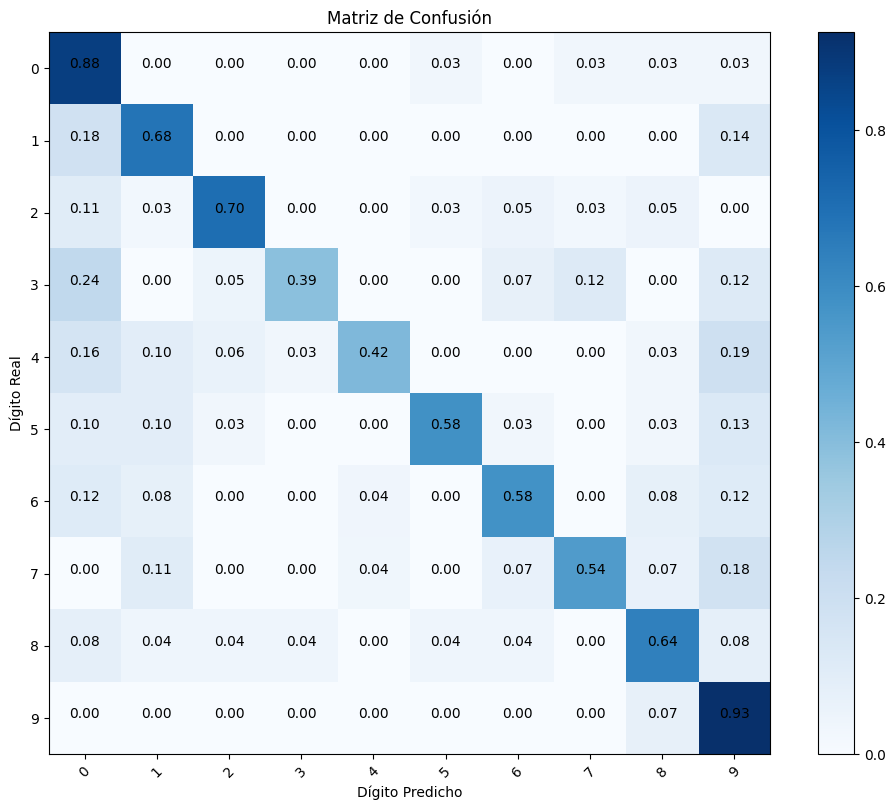

In [34]:
# Crear un DataFrame de Pandas a partir de la matriz de confusión
labels = [str(i) for i in range(10)]
df_cm = pd.DataFrame(confusion_matrix, index=labels, columns=labels)

# Crear una figura de Matplotlib y un eje para la matriz de confusión
plt.figure(figsize=(10, 8))
plt.imshow(df_cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()

# Añadir etiquetas de clase a los ejes
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

# Añadir los valores en cada celda
thresh = df_cm.max() / 2.0
for i in range(df_cm.shape[0]):
    for j in range(df_cm.shape[1]):
        plt.text(j, i, f'{confusion_matrix[i][j]:.2f}',
                horizontalalignment="center")

plt.tight_layout()
plt.ylabel('Dígito Real')
plt.xlabel('Dígito Predicho')
plt.show()



### Mismo pero con otra red